Öncelikle gerekli kütüphaneleri import edelim ve oluşturduğumuz çalışma dizininin içerisine gidelim.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('C:/Users/ORDU/Desktop/Lineer_Regression')

İndirdiğimiz csv formatindaki dataset'i pandas kütüphanesi read_cvs() metodu yardımıyla okuma işlemini gerçekleştirelim.

In [4]:
dataset = pd.read_csv('bisiklet_fiyatlari.csv')

head() fonksiyonu yardımıyla dataset'imizin ilk 5 ögesini görüntüleyelim

In [18]:
dataset.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


İki sütunumuz var. İlki Kıdem, ikincisi maaş. Burada kıdemin maaşa etkisini inceleyen basit doğrusal regresyon örneği yapacağız.Kıdem bağımsız değişken(x), maaş ise bağımlı değişkendir(y). Başka bir deyişle; çalışanın iş tecrübesi alacağı maaşı genellikle etkiler, gerçek hayattan da az çok bildiğimiz gibi bu etki pozitif yöndedir. Kuracağımız basit regresyon modelinde kıdem arttıkça maaş artar demeye getireceğiz.

Veri Setinden Bağımlı ve Bağımsız Değişkenleri Oluşturmak.Şimdi x nitelikler matrisini ve y bağımsız değişken vektörünü oluşturalım.

In [6]:
X = dataset.iloc[:, 0:1].values
##:, ile tüm değerleri getir
y=dataset.iloc[:, 2:3].values

In [7]:
X

array([[ 807.6738764],
       [ 959.2275201],
       [ 718.0200329],
       [ 945.6688847],
       [ 955.5429676],
       [ 950.2214253],
       [ 972.0999123],
       [ 730.7470179],
       [ 653.0064296],
       [1108.363012 ],
       [1092.432411 ],
       [ 831.9017301],
       [1050.644778 ],
       [ 932.4576656],
       [ 827.4618849],
       [ 886.0465092],
       [ 889.7252105],
       [1068.296866 ],
       [ 566.4010835],
       [ 780.8715318],
       [ 633.7147302],
       [ 758.4686205],
       [ 983.5045088],
       [1115.291836 ],
       [ 914.9140132],
       [ 822.1549425],
       [ 950.4423736],
       [ 989.5097974],
       [ 927.5574942],
       [1068.515289 ],
       [ 844.4737208],
       [ 573.2300709],
       [1014.528968 ],
       [ 784.7521757],
       [1100.709911 ],
       [ 939.3954013],
       [ 997.617767 ],
       [ 626.1947566],
       [1071.148623 ],
       [ 778.1894898],
       [1050.207614 ],
       [ 916.1829736],
       [ 897.6624037],
       [107

In [15]:
y

array([[1749.590668],
       [1751.824206],
       [1747.977026],
       [1750.771646],
       [1750.59243 ],
       [1751.099011],
       [1750.778662],
       [1748.037351],
       [1747.332994],
       [1752.790342],
       [1750.855601],
       [1749.2369  ],
       [1752.425774],
       [1749.893437],
       [1750.096879],
       [1749.70124 ],
       [1751.256074],
       [1750.851538],
       [1746.810549],
       [1747.851739],
       [1748.17437 ],
       [1748.500451],
       [1749.610612],
       [1751.886485],
       [1750.954059],
       [1749.000053],
       [1750.716489],
       [1751.783591],
       [1750.483304],
       [1751.474736],
       [1750.105018],
       [1746.458225],
       [1751.620021],
       [1749.481991],
       [1751.943308],
       [1749.58896 ],
       [1750.904433],
       [1748.303847],
       [1750.689555],
       [1749.840062],
       [1752.160562],
       [1751.183114],
       [1751.334307],
       [1750.969123],
       [1748.59648 ],
       [17

Değişkenlerimizi eğitim ve test olmak üzere ikiye bölelim.Veri setinden eğitim için 2/3, test için 1/3 oranında veri ayıralım.



In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

X_train ve buna karşılık gelen y_train verisiyle modelimizi eğiteceğiz. Bunun için scikit-learn kütüphanesinden LinearRegression sınıfına ihtiyacımız olacak. Kütüphaneyi indirip sınıf nesnemizi oluşturalım

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor nesnemizi yarattık. Şimdi fit() metodunu kullanarak modelimizi eğitiyoruz. Parametre olarak yukarıda oluşturduğumuz X_train, y_train eğitim setlerimizi kullanacağız.

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

Model üzerinde tahminler yapmak için model oluşturduk. Şimdi sıra eğittiğimiz modele girdiler verelim bakalım bize nasıl sonuçlar üretecek. Bunun için nitelikler matrisinden ayırdığımız X_test verilerini kullanacağız. Daha önce oluşturduğumuz makineyi (regressor) yine kullanıyoruz ancak bu sefer fit() metodu değil de predict() metodu.

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
y_pred

array([[1750.64664181],
       [1748.54418762],
       [1748.52274629],
       [1751.1488705 ],
       [1750.64481032],
       [1751.97328884],
       [1750.09180311],
       [1751.18345775],
       [1749.60122866],
       [1750.32542572],
       [1751.35937293],
       [1747.79050869],
       [1748.48796187],
       [1750.48229599],
       [1748.63904658],
       [1749.67829106],
       [1750.94876647],
       [1750.32198057],
       [1749.1325504 ],
       [1747.92864634],
       [1751.79438489],
       [1750.51323059],
       [1750.60302126],
       [1749.91586475],
       [1752.25505962],
       [1750.18878704],
       [1750.84455028],
       [1750.26848824],
       [1749.34963687],
       [1750.7205561 ],
       [1747.65117233],
       [1749.37123203],
       [1750.53359653]])

Regresyon grafiği çizmek ve yorumlamak matplotlib.pyplot kütüphanesini kullanarak kurduğumuz modeli, tahminleri, regresyon doğrusunu ve veri noktalarını (data points) görelim. Önce eğitim veri setinin (gerçek veriler) saçılma diyagramını çizelim

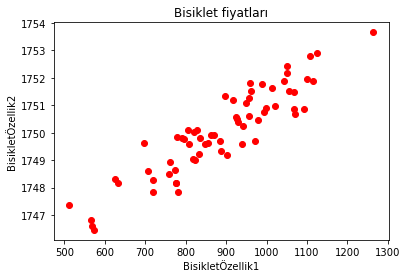

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.title('Bisiklet fiyatları')
plt.xlabel('BisikletÖzellik1')
plt.ylabel('BisikletÖzellik2')
plt.show()

Yukarıdaki grafikte eğitim için ayırdığımız verilerin saçılma diyagramını görüyoruz. İlk bakışta zaten doğrusal pozitif bir ilişki göze çarpıyor. Şimdi Aynı gerçek eğitim verisini modelimize verelim ve bize maaş değerlerini tahmin etsin ve bunun grafiğini çizelim.

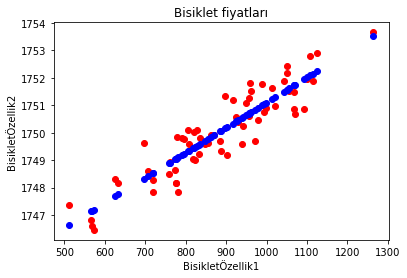

In [23]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Bisiklet fiyatları')
plt.xlabel('BisikletÖzellik1')
plt.ylabel('BisikletÖzellik2')
plt.show()

Gördüğümüz gibi eğittiğimiz modele tekrar aynı girdileri (X_train) verdiğimizde bize mavi noktaları söylüyor. Regresyon doğrusu olarak da sadece geriye mavi noktaları birleştirmek kalıyor.

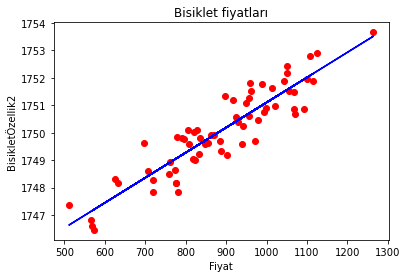

In [44]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Bisiklet fiyatları')
plt.xlabel('BisikletÖzellik1')
plt.ylabel('BisikletÖzellik2')
plt.show()